In this notebook, I employ predictive analytics, a potent method for gleaning insights from data and shaping data-driven decision-making. My exploration is grounded in the LinkedIn dataset, serving as the bedrock of this analysis. Central to my investigation is the anticipation of 'Content Type,' a pivotal metric within the social media domain. 'Content Type' encapsulates a multitude of engagement interactions, including likes, shares, reactions, comments, and saves. These interactions denote the extent to which individuals not only consumed but actively engaged with the content. To accomplish these predictions, I harness a meticulously curated set of features that persist throughout my analysis.

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Loading Data

In [2]:
path = "C:/Users/user/Downloads/DiceyTechHack"
data = pd.read_csv(path +"/LinkedInData.csv")

Data Familirization

In [3]:
data.head(2)

,Date,Content Type,Sent by,Post,Impressions,Organic Impressions,Engagement Rate (per Impression),Engagements,Reactions,Likes,Comments,Shares,Click-Through Rate,Post Link Clicks,Post Clicks (All),Video Views,Organic Video Views,Tags
0,7/13/2023 12:03,Photo,Blessing Ubah,Your money should not be a gamble. Before you ...,0,0,0.0,0,0,0,0,0,0.0,0,0,0,0,CIB Posts
1,7/12/2023 20:00,Text,Blessing Ubah,"What skill (s) do you have, that no one ever t...",0,0,0.0,0,0,0,0,0,0.0,0,0,0,0,Other


Data Cleaning

In [21]:
data.isnull().sum()

Content Type                         0
Sent by                              0
Impressions                          0
Organic Impressions                  0
Engagement Rate (per Impression)     0
Engagements                          0
Reactions                            0
Likes                                0
Comments                             0
Shares                               0
Click-Through Rate                   0
Post Link Clicks                     0
Post Clicks (All)                    0
Video Views                          0
Organic Video Views                  0
Tags                                 0
PostHour                             0
PostMonth                            0
PostYear                             0
num_post_words                      31
dtype: int64

In [22]:
data.num_post_words.fillna(0, inplace=True) 

Data Preprocessing

In [4]:
data["Date"] = pd.to_datetime(data["Date"])
data["PostHour"] = data["Date"].dt.hour
data["PostMonth"] = data["Date"].dt.month_name()
data["PostYear"] = data["Date"].dt.year

In [6]:
data["Post"].dtypes

dtype('O')

In [ ]:
data.drop("Post", axis=1, inplace=True)
data.drop("Date", axis=1, inplace=True)

In [24]:
numeric_data = data.select_dtypes(include=[np.number])
cat_data = data.select_dtypes(exclude=[np.number])
print ("There are {} numeric and {} categorical columns in train data".format(numeric_data.shape[1],cat_data.shape[1]))

There are 17 numeric and 3 categorical columns in train data


In [25]:
data.head(2)

,Content Type,Sent by,Impressions,Organic Impressions,Engagement Rate (per Impression),Engagements,Reactions,Likes,Comments,Shares,Click-Through Rate,Post Link Clicks,Post Clicks (All),Video Views,Organic Video Views,Tags,PostHour,PostMonth,PostYear,num_post_words
0,2,Blessing Ubah,0,0,0.0,0,0,0,0,0,0.0,0,0,0,0,CIB Posts,12,July,2023,276.0
1,4,Blessing Ubah,0,0,0.0,0,0,0,0,0,0.0,0,0,0,0,Other,20,July,2023,90.0


Label Encoding

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["Content Type"] = le.fit_transform(data["Content Type"])

In [27]:
X = data.drop(["Content Type"],axis=1)
y = data["Content Type"]

In [28]:
le = LabelEncoder()

def processing_data(dataa):
     processed_data = data.copy()

     categ = ["Sent by",
              "Tags",
              "PostMonth"]
    
     for col in categ:
        processed_data[col] = le.fit_transform(processed_data[col])

     return pd.DataFrame(processed_data, columns = processed_data.columns) 

In [29]:
processed_X = processing_data(X) 

In [30]:
processed_X.shape

(7760, 20)

In [31]:
processed_X.head(2)

,Content Type,Sent by,Impressions,Organic Impressions,Engagement Rate (per Impression),Engagements,Reactions,Likes,Comments,Shares,Click-Through Rate,Post Link Clicks,Post Clicks (All),Video Views,Organic Video Views,Tags,PostHour,PostMonth,PostYear,num_post_words
0,2,2,0,0,0.0,0,0,0,0,0,0.0,0,0,0,0,39,12,5,2023,276.0
1,4,2,0,0,0.0,0,0,0,0,0,0.0,0,0,0,0,69,20,5,2023,90.0


Model Selection

In [32]:
from sklearn.model_selection import train_test_split,KFold
from sklearn.feature_selection import SelectKBest,f_classif,mutual_info_regression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score

In [33]:
X_train,X_test,y_train,y_test = train_test_split(processed_X,y,test_size=0.2,random_state=42)

In [34]:
k = 20
selector = SelectKBest(score_func=f_classif,k=k)
X_selected = selector.fit_transform(X_train,y_train)
X_test_selected = selector.transform(X_test)

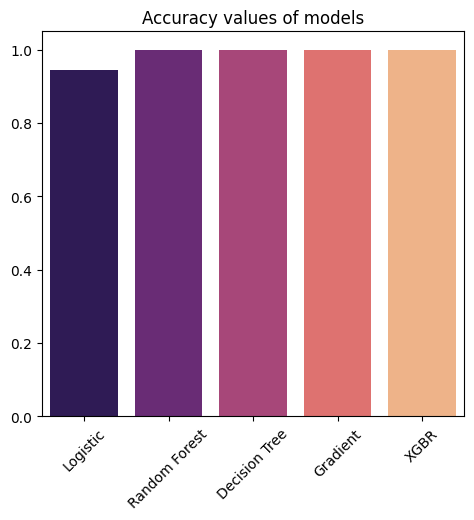

In [35]:
models = {"Logistic":LogisticRegression(),
          "Random Forest":RandomForestClassifier(random_state=42),
          "Decision Tree":DecisionTreeClassifier(random_state=42),
          "Gradient":GradientBoostingClassifier(random_state=42),
          "XGBR":XGBClassifier(random_state=42)
}

accuracy_values= []

for name, model in models.items():
     model.fit(X_selected,y_train)
     preds = model.predict(X_test_selected)
     accuracy = accuracy_score(y_test,preds)
     accuracy_values.append(accuracy)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)

sns.barplot(x= list(models.keys()), y = accuracy_values, palette = "magma")
plt.title("Accuracy values of models")
plt.xticks(rotation=45)
plt.show()

Model Evaluation

In [36]:
models = [
    RandomForestClassifier()
]

for model in models:
    model.fit(X_selected, y_train)
    y_pred = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)

    # Print the accuracy score of the model
    print(f"Accuracy of {model.__class__.__name__} is {accuracy:.4f}")

Accuracy of RandomForestClassifier is 0.9994
